## Team 2413:
- Maryam Gholami Shiri (2013071)
- Muhammad Usama Qasim (2040472)
- Laura Schulze (2122311)
- Savina Tsichli (10738280)

# Exercise 4: Restricted Boltzmann Machines (RBMs)
We want to study the performances of an RBM, and, by looking at its learned weights and biases,
better understand the correlations in the data (from file x_RBM_2024_exercise.dat, N=104
configurations with L=10 bits). Use an RBM with M=3 hidden units.

## 4.1 
Increase the number of contrastive divergence steps from n=1 to n=5.

In [ ]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from IPython.display import display_html 
import pandas as pd
plt.rcParams['font.size'] = 13

### Data
dname="DATA"
fname=dname+'/x_RBM_2024_exercise.dat'

# loading data: each row is a list of visible units
v = np.loadtxt(fname, delimiter=" ", dtype=int)

# RBM, nr of hidden units
M = 3
# range of each initial weight
sigma = sqrt(4. / float(len(v[0]) + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr.
w = sigma * np.random.randn(len(v[0]), M)
a = sigma * np.random.randn(len(v[0]))
b = np.zeros(M)

## Plotting

def plotgraph():
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    A = 1. / max(w.max(), -w.min())
    for i in range(len(v[0])):
        for j in range(M):
            ex, ey, col = (i, j), (i + 1, j), mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A * abs(w[i][j]))

    A = 300.
    for i in range(len(v[0])):
        ax.scatter(i, 0, s=A * abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(len(v[0]) + 1, j, s=min(300, A * abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title('>0 red, <0 blue')

def mycolor(val):
    if val > 0:
        return 'red'
    elif val < 0:
        return 'blue'
    else:
        return 'black'

def activate(v_in, wei, bias, DE):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE * act))
    v_out = np.full(n, 0, dtype=int)
    v_out[np.random.random_sample(n) < prob] = 1
    return v_out

## RBM train

np.random.seed(12345)

plotgraph()

l_rate = 1.0
mini, m = 500, 0

for epoch in range(100):
    l_rate_m = l_rate / mini
    np.random.shuffle(v)  # Shuffle data at the beginning of each epoch
    for k in range(len(v)):
        if m == 0:
            v_data, v_model = np.zeros(len(v[0])), np.zeros(len(v[0]))
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((len(v[0]), M)), np.zeros((len(v[0]), M))

        h = activate(v[k], w, b, 1)
        vf = activate(h, w.T, a, 1)
        hf = activate(vf, w, b, 1)

        v_data += v[k]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)

        m += 1
        if m == mini:
            dw = l_rate_m * (vh_data - vh_model)
            da = l_rate_m * (v_data - v_model)
            db = l_rate_m * (h_data - h_model)
            w = w + dw
            a = a + da
            b = b + db
            m = 0

    l_rate = l_rate / (0.01 * l_rate + 1)

print("Final weights:", w)
print("Final visible bias:", a)
print("Final hidden bias:", b)
plotgraph()
plt.show()

## 4.2
Compute the log-likelihood $\mathscr{L}$ during the training, at every epoch, or every minibatch update if it reaches a maximum already in the first epoch. Use “t” as an index of this “time”, indicating the unit in the figures.

(10000, 10)
Epoch 1, Log-Likelihood: -2.893945592107333
Epoch 2, Log-Likelihood: -3.549953800860304
Epoch 3, Log-Likelihood: -4.417746941467284
Epoch 4, Log-Likelihood: -3.0037992178541058
Epoch 5, Log-Likelihood: -3.8437388040453744
Epoch 6, Log-Likelihood: -6.248555432370556
Epoch 7, Log-Likelihood: -5.295786273491442
Epoch 8, Log-Likelihood: -8.4125347416389
Epoch 9, Log-Likelihood: -6.354749305928241
Epoch 10, Log-Likelihood: -5.965998848879015
Epoch 11, Log-Likelihood: -6.268601438819379
Epoch 12, Log-Likelihood: -5.057989874485438
Epoch 13, Log-Likelihood: -4.664356093994034
Epoch 14, Log-Likelihood: -5.096369494224909
Epoch 15, Log-Likelihood: -8.648987680570036
Epoch 16, Log-Likelihood: -6.193836973929104
Epoch 17, Log-Likelihood: -7.276758613367334
Epoch 18, Log-Likelihood: -6.653695262265673
Epoch 19, Log-Likelihood: -7.841761643082869
Epoch 20, Log-Likelihood: -7.450949156375521
Epoch 21, Log-Likelihood: -6.457958890270811
Epoch 22, Log-Likelihood: -6.223643307492037
Epoch 2

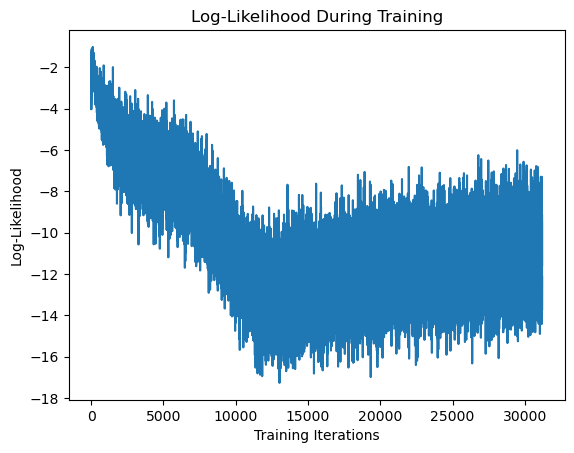

In [13]:
import numpy as np

# Load data
data = np.loadtxt('x_RBM_2024_exercise.dat')
print(data.shape)

# Initialize RBM Parameters
N_visible = 10  # Number of visible units
N_hidden = 3    # Number of hidden units
W = np.random.randn(N_visible, N_hidden)  # Weight matrix
b_visible = np.zeros(N_visible)           # Visible bias
b_hidden = np.zeros(N_hidden)             # Hidden bias

# Define the log-likelihood function
def log_likelihood(data, W, b_visible, b_hidden):
    energy = np.sum(-np.dot(data, b_visible)[:, np.newaxis] - np.log(1 + np.exp(np.dot(data, W) + b_hidden)), axis=1)
    return np.mean(energy)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Contrastive Divergence (CD) training
def CD_train(data, W, b_visible, b_hidden, learning_rate=0.1, k=1):
    num_data = len(data)
    # Positive phase
    positive_hidden = sigmoid(np.dot(data, W) + b_hidden)
    positive_associations = np.dot(data.T, positive_hidden)

    # Negative phase
    negative_visible = np.random.binomial(1, sigmoid(np.dot(positive_hidden, W.T) + b_visible))
    for i in range(k):
        negative_hidden = sigmoid(np.dot(negative_visible, W) + b_hidden)
        negative_visible = np.random.binomial(1, sigmoid(np.dot(negative_hidden, W.T) + b_visible))
    negative_associations = np.dot(negative_visible.T, negative_hidden)

    # Update parameters
    W += learning_rate * ((positive_associations - negative_associations) / num_data)
    b_visible += learning_rate * np.mean(data - negative_visible, axis=0)
    b_hidden += learning_rate * np.mean(positive_hidden - negative_hidden, axis=0)

# Training Loop
epochs = 100  # Number of epochs
batch_size = 32  # Batch size
num_batches = len(data) // batch_size

log_likelihoods = []

for epoch in range(epochs):
    # Shuffle the data for each epoch
    np.random.shuffle(data)
    
    for batch_idx in range(num_batches):
        batch_data = data[batch_idx * batch_size: (batch_idx + 1) * batch_size]
        
        # Update RBM parameters using CD
        CD_train(batch_data, W, b_visible, b_hidden)
        
        # Compute log-likelihood after each minibatch update
        ll = log_likelihood(batch_data, W, b_visible, b_hidden)
        log_likelihoods.append(ll)
    print(f"Epoch {epoch+1}, Log-Likelihood: {ll}")

# Plot log-likelihood over time
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Training Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood During Training')
plt.show()

## 4.3
Try RBMs with different numbers of hidden units: M=1, 2, 3 (done above), 4, 5, and 6.

## 4.4
for M=3, plot $\mathscr{L}$ as a function of “t”, comparing the two contrastive divergence cases (n=1 and n=5). Then, for n=1, plot $\mathscr{L}$ as a function of “t”, comparing the two cases with different M.

## 4.5
From the weights learned by the RBM, guess the structure of the data.

To compute $\mathscr{L}$ , consider full configurations x=(v,h) and their energy E(x). With $\mathscr{L}$ visible units and M hidden units, we have 2L+M possible configurations. The partition function Z is the sum of all their Boltzmann weights e-E(x). The average expectation of the energy according to data is computed by averaging the energy of each data sample vn completed with all 2M possible hidden states. Thus, in total there are N*2M configurations to use in the <E>data average.

The package `itertools` is useful for generating the possible configurations.
https://docs.python.org/3/library/itertools.html
```python
Q=4
import itertools as it
conf = it.product((0,1), repeat=Q)
all_conf=list(conf)
for x in all_conf:
print(x)
```